In [83]:
# this code can read data and metadata in 384-well format and do the math
# it also asks the user for the name of the data and metadata file names and names the output files accordingly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ask user how the data should be called
data_input = input("Please insert name of data-file (data-file.csv): ") + ".csv"
metadata_input = input("Please insert name of metadata-file (data-file.csv): ") + ".csv"
data_name = data_input.split(".")
data_name = data_name[0]


# get current location and create an output folder
current_path = os.getcwd() + "/"
folder_path = current_path + "output/"
if not os.path.exists(folder_path):
    output_folder = os.makedirs(folder_path)
    print(f"Folder created at {folder_path}")
else: print(f"Folder already exists at {folder_path}")    

# size and resolution of the graphs    
fig_size_bar = (10, 20) # width, height in inch
fig_size_heat = (20, 10)
dpi = 400

Please insert name of data-file (data-file.csv): 231110_S-aureus_endpoint24h_read600nm_180rpm.xpt
Please insert name of metadata-file (data-file.csv): metadata_SA
Folder already exists at /Users/joschameiers/Desktop/Science & Work/Harvard/Virtual-Labbook_R-Space/Human-Microbiome-Extract-Library_Antibiotic-Activity-Screening/Antimicrobial Activity Assay/231109_E-coli_S-aureus_Biomek-brathseal-shake_endpoint/input_output/output/


In [84]:
# Read the data from a CSV file
data = pd.read_csv(data_input, sep=',', index_col=0)
metadata = pd.read_csv(metadata_input, sep=',', index_col=0)

# Transpose the DataFrame
data_T = data.T
metadata_T = metadata.T

# Reset the index and rename the columns
data_T = data_T.reset_index()
data_T = data_T.rename(columns={'index': 'well'})
meatadata_T = metadata_T.reset_index()
metadata_T = meatadata_T.rename(columns={'index': 'well'})

# Melt the DataFrame to create the desired format
data_T_melt = pd.melt(data_T, id_vars=['well'], var_name='OD')
metadata_T_melt = pd.melt(metadata_T, id_vars=['well'], var_name='condition')

# Combine the 'Well' and 'OD' columns
data_T_melt['well'] = data_T_melt['OD'] + data_T_melt['well']
metadata_T_melt['well'] = metadata_T_melt['condition'] + metadata_T_melt['well']

# Keep only the 'Well_OD' and 'value' columns
data_T_melt = data_T_melt[['well', 'value']]
metadata_T_melt = metadata_T_melt[['well', 'value']]

# Rename the 'value' column to 'OD'
data_T_melt = data_T_melt.rename(columns={'value': 'OD'})
metadata_T_melt = metadata_T_melt.rename(columns={'value': 'condition'})

# merge data and metadata
merged_data = pd.merge(data_T_melt, metadata_T_melt, on = 'well')
# save merged data file to use it in prism:
merged_data.to_csv(os.path.join(folder_path + data_name + '_merged_data.csv'), index=False)
print("saved at: " + os.path.join(folder_path))


saved at: /Users/joschameiers/Desktop/Science & Work/Harvard/Virtual-Labbook_R-Space/Human-Microbiome-Extract-Library_Antibiotic-Activity-Screening/Antimicrobial Activity Assay/231109_E-coli_S-aureus_Biomek-brathseal-shake_endpoint/input_output/output/


In [85]:
# visual control of the transformed tables
print("this is data_T_melt: \n ", data_T_melt, "\n")
print("this is metadata: \n ", metadata_T_melt, "\n")
print("this is merged data: \n ", merged_data, "\n")

this is data_T_melt: 
               well     OD
0              A1  1.227
1              A2  1.138
2              A3  1.098
3              A4  1.109
4              A5  1.090
..            ...    ...
395           P21  1.115
396           P22  0.979
397           P23  1.091
398           P24  1.076
399  PUnnamed: 25    NaN

[400 rows x 2 columns] 

this is metadata: 
      well               condition
0     A1              DMSO, MSSA
1     A2              DMSO, MSSA
2     A3              DMSO, MSSA
3     A4              DMSO, MSSA
4     A5              DMSO, MSSA
..   ...                     ...
379  P20  1.33 µg/mL cipro, MRSA
380  P21  1.33 µg/mL cipro, MRSA
381  P22  1.33 µg/mL cipro, MRSA
382  P23  1.33 µg/mL cipro, MRSA
383  P24  1.33 µg/mL cipro, MRSA

[384 rows x 2 columns] 

this is merged data: 
      well     OD               condition
0     A1  1.227              DMSO, MSSA
1     A2  1.138              DMSO, MSSA
2     A3  1.098              DMSO, MSSA
3     A4  1.109        

In [86]:
# remove well column
merged_data = merged_data.drop("well", axis=1)
merged_data = merged_data.sort_values(by='condition', ascending=False)
print(merged_data)

        OD               condition
0    1.227              DMSO, MSSA
240  1.058              DMSO, MSSA
152  1.078              DMSO, MSSA
153  0.767              DMSO, MSSA
154  1.067              DMSO, MSSA
..     ...                     ...
230  0.602  1.33 µg/mL cipro, MRSA
231  0.612  1.33 µg/mL cipro, MRSA
232  0.603  1.33 µg/mL cipro, MRSA
233  0.598  1.33 µg/mL cipro, MRSA
383  1.076  1.33 µg/mL cipro, MRSA

[384 rows x 2 columns]


In [87]:
# Group the merged_data DataFrame by 'Condition' and calculate both mean and standard deviation
# the .agg function calculates both mean and standard deviation
grouped_data = merged_data.groupby('condition').agg({'OD': ['mean', 'std']})

# Reset the index to make 'Condition' a column instead of an index
grouped_data.reset_index(inplace=True)

# Rename the columns for clarity
grouped_data.columns = ['condition', 'mean_OD', 'std_OD']

# Print the resulting DataFrame
print(grouped_data)

                condition   mean_OD    std_OD
0  1.33 µg/mL cipro, MRSA  0.784792  0.189226
1  1.33 µg/mL cipro, MSSA  0.215510  0.077664
2              DMSO, MRSA  0.797667  0.195267
3              DMSO, MSSA  0.930052  0.161347


In [88]:
# now calculate a z-score
# the .loc function extracts the value from the table at the crossing point of the descriptors
# the .iloc function lets you do the same, but based on integer row and column positions (e.g. 0, 3)
# df.iloc[row_position, column_position], keep in mind that the df is zero-indexed
mean_neg = grouped_data.iloc[1, 1]
mean_pos = grouped_data.iloc[0, 1]
std_neg = grouped_data.iloc[1, 2]
std_pos = grouped_data.iloc[0, 2]
z = 1 - (3*(std_pos+std_neg))/(mean_pos-mean_neg)
print(z)
grouped_data.to_csv(os.path.join(folder_path + data_name + '_statistics_data.csv'), index=False)

-0.40646050470992057


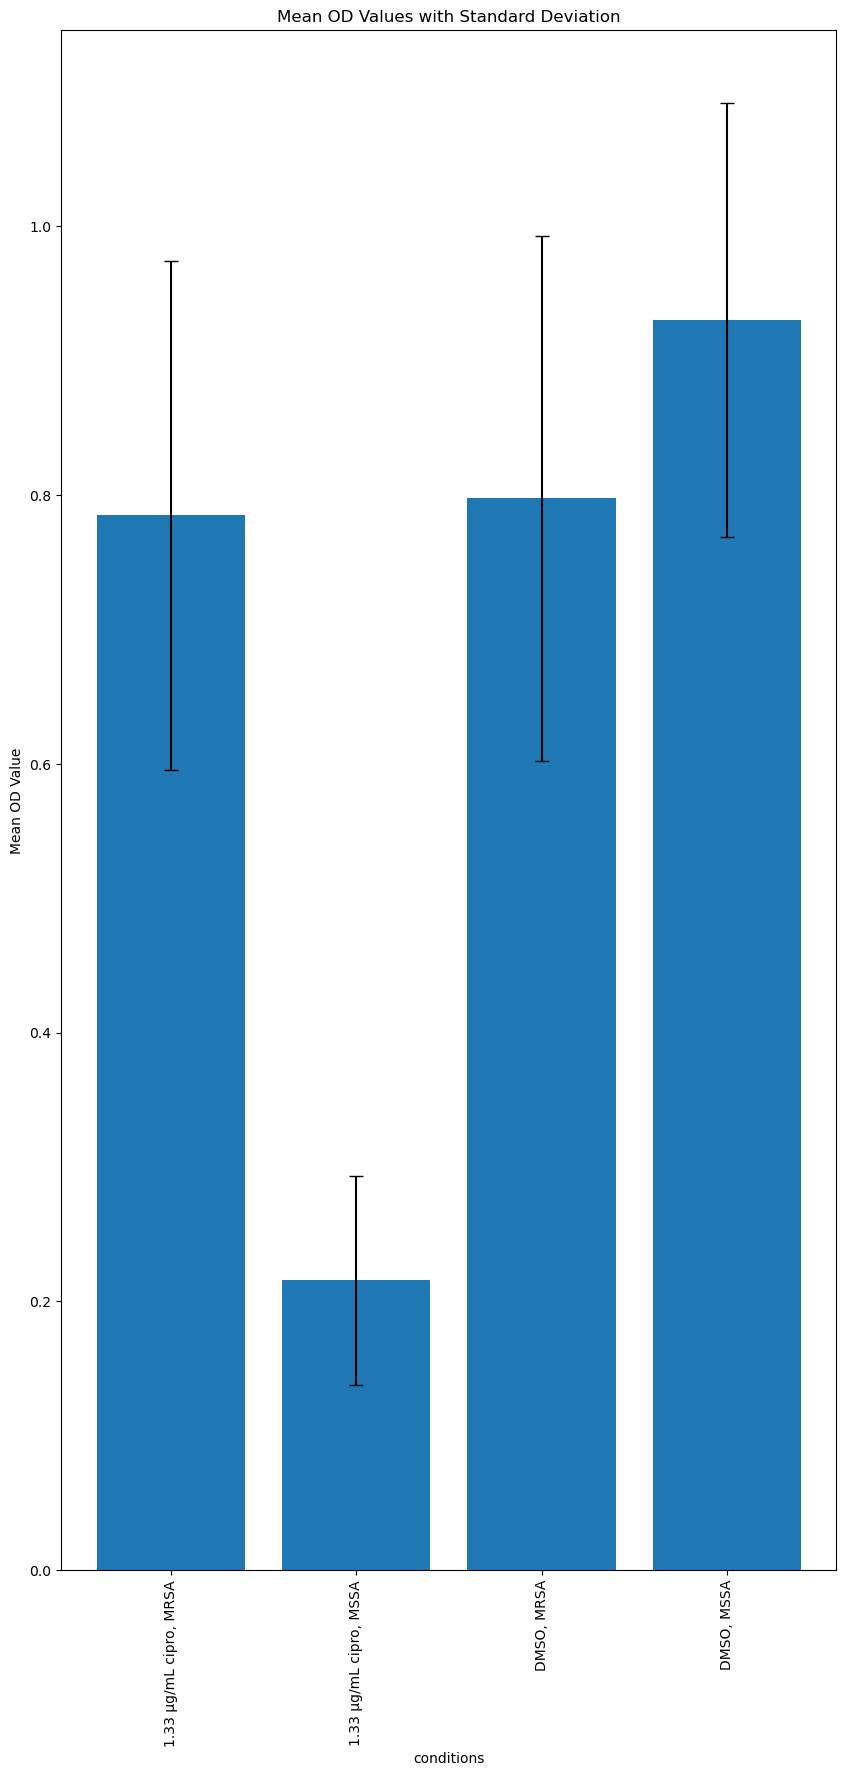

In [89]:
# Plot the mean values
plt.bar(grouped_data['condition'], grouped_data['mean_OD'], yerr=grouped_data['std_OD'], capsize=5)
plt.xlabel('conditions')
plt.ylabel('Mean OD Value')
plt.title('Mean OD Values with Standard Deviation')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.gcf().set_size_inches(fig_size_bar)
plt.savefig(os.path.join(folder_path + data_name + '_bar-graph.png'), dpi=dpi) # remember to save figs before plt.show them! It doenst work the other way around
plt.show()

       1      2      3      4      5      6      7      8      9     10  ...  \
A  1.227  1.138  1.098  1.109  1.090  1.123  1.115  1.075  1.043  1.135  ...   
B  0.285  0.264  0.188  0.186  0.306  0.260  0.229  0.282  0.200  0.202  ...   
C  1.107  0.970  0.784  0.845  0.994  0.736  0.846  0.909  0.902  0.963  ...   
D  0.285  0.138  0.120  0.137  0.181  0.148  0.140  0.137  0.139  0.136  ...   
E  1.194  1.104  1.108  1.114  0.740  0.678  0.941  1.101  0.730  0.792  ...   
F  0.315  0.213  0.213  0.159  0.146  0.150  0.362  0.316  0.147  0.158  ...   
G  1.191  0.731  0.774  0.916  0.899  0.989  0.787  0.934  1.078  0.767  ...   
H  0.283  0.164  0.330  0.331  0.270  0.352  0.322  0.339  0.312  0.394  ...   
I  1.154  0.717  0.835  0.859  0.733  0.786  0.778  0.746  0.670  0.850  ...   
J  0.298  0.174  0.109  0.116  0.123  0.133  0.165  0.179  0.174  0.174  ...   
K  1.058  0.761  0.857  0.649  0.723  0.710  0.741  0.913  0.985  0.801  ...   
L  0.300  0.248  0.148  0.145  0.208  0.

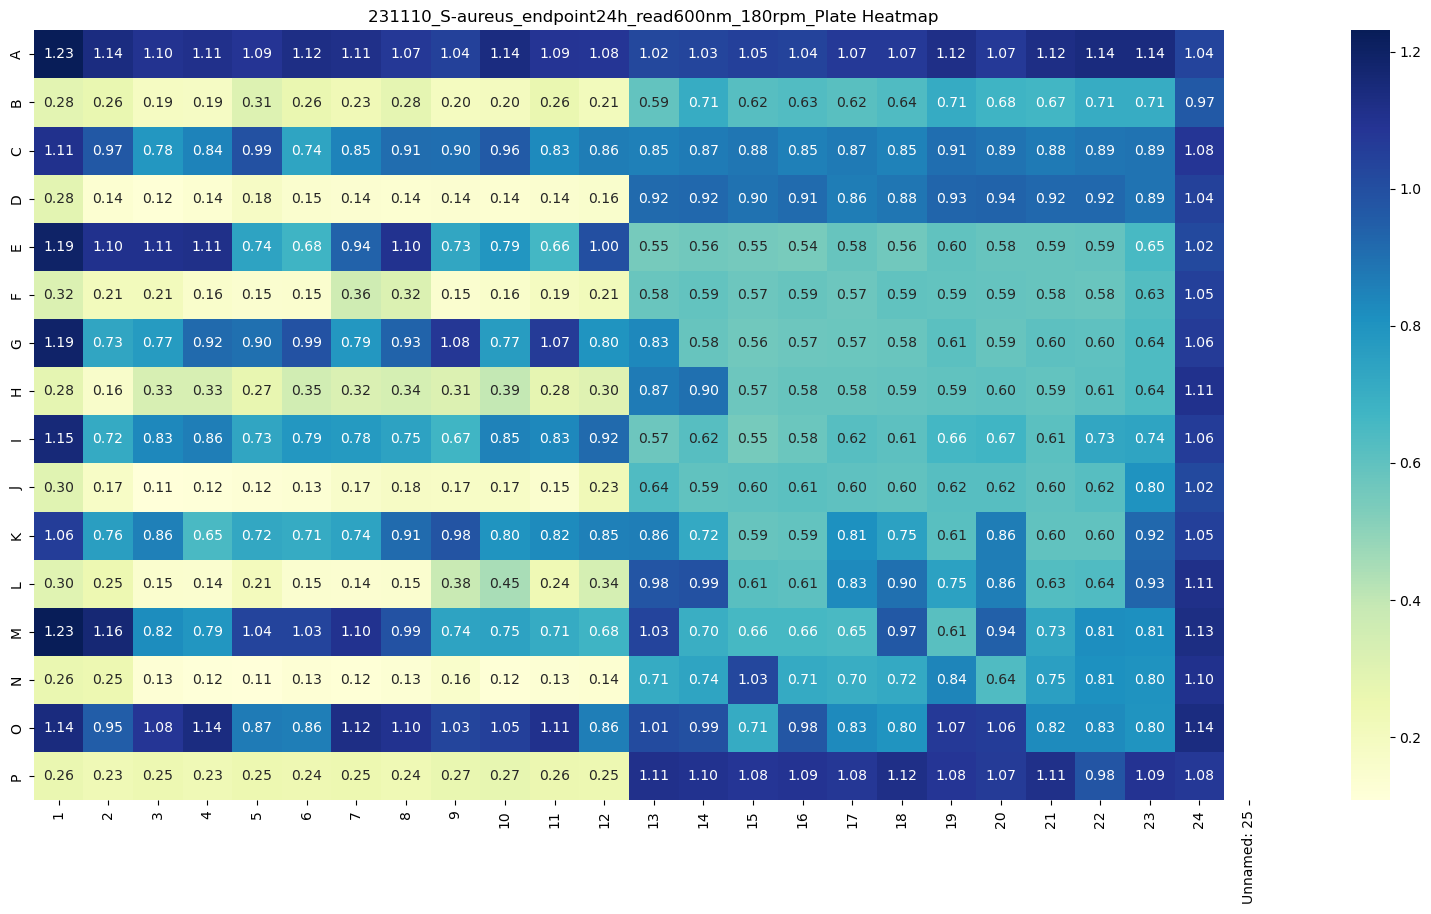

In [90]:
# Generate Heat Map of data file
print(data)
plt.figure(figsize=fig_size_heat)
sns.heatmap(data, cmap='YlGnBu', annot=True, fmt='.2f', cbar=True, square=False)
plt.title(data_name + '_Plate Heatmap')
plt.savefig(os.path.join(folder_path + data_name + '_heat-map.png'), dpi=dpi)
plt.show()